In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm_notebook as tqdm

In [2]:
# !pip3 install google.colab
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

In [3]:
# df = pd.read_csv('MyDrive/FCUP/Tese/lucas_2020.csv')
df = pd.read_csv('lucas_2020.csv')
df.describe()


,Taxi_ID,State,Timestamp,Stand,Distance,Duration
count,6.072210e+05,607221.0,6.072210e+05,607221.0,5.937000e+05,607221.000000
mean,2.000035e+07,6.0,1.590052e+09,0.0,6.841338e+03,826.974508
std,2.229818e+02,0.0,8.555251e+06,0.0,1.483929e+04,876.472100
min,2.000000e+07,6.0,1.577837e+09,0.0,0.000000e+00,0.000000
25%,2.000017e+07,6.0,1.581622e+09,0.0,2.826522e+03,435.000000
50%,2.000033e+07,6.0,1.590744e+09,0.0,4.797821e+03,670.000000
75%,2.000051e+07,6.0,1.597968e+09,0.0,8.254134e+03,987.000000
max,2.000100e+07,6.0,1.604189e+09,0.0,8.951434e+06,44093.000000


In [4]:
df.head()


,Taxi_ID,State,Timestamp,Stand,Src,Dst,Distance,Duration
0,20000012,6,1577837132,0,"(-8.60643, 41.144607)","(-8.591688, 41.146677000000004)",2351.740022,298
1,20000031,6,1577837216,0,"(-8.609184, 41.162274000000004)","(-8.609967000000001, 41.153832)",959.068005,102
2,20000667,6,1577837386,0,"(-8.619795, 41.148018)","(-8.624358, 41.179554)",4406.003140,513
3,20000607,6,1577837418,0,"(-8.612991000000001, 41.155182)","(-8.630595, 41.15448)",2557.944254,327
4,20000856,6,1577837503,0,"(-8.621397, 41.152833)","(-8.641323, 41.144175000000004)",5728.895360,472


## Format Coordenate Data

In [5]:
# the original data is a string with the format '(x, y)'

def format_coordenate_data(data):
  if str(data) != 'nan':
    x = float(data.split(',')[0][1:])
    y = float(data.split(',')[1][:-1])
    return [x, y]
  return np.NaN
df.Src = df.Src.apply(format_coordenate_data)
df.Dst = df.Dst.apply(format_coordenate_data)

## Concert variable Taxi_id to string

In [6]:
df.Taxi_ID = df.Taxi_ID.apply(str)


## Remove data that have NaN in Src or Dst

In [7]:
df.dropna(inplace=True)


# Drop Unified Columns

In [8]:
df.drop('State',  axis='columns', inplace=True)
df.drop('Stand',  axis='columns', inplace=True)


In [9]:
df.shape


(593700, 6)

# Create Weekly Day and Hour of Day variables

In [10]:
def cust_timestamp(time):
  return pd.Timestamp(time, unit='s', tz='Etc/GMT')

def get_hour(time):
  return time.hour

df['Timestamp_format'] = df.Timestamp.apply(cust_timestamp)

In [11]:
df['Week_day'] = df.Timestamp_format.apply(pd.Timestamp.weekday)
df['Hour'] = df.Timestamp_format.apply(get_hour)


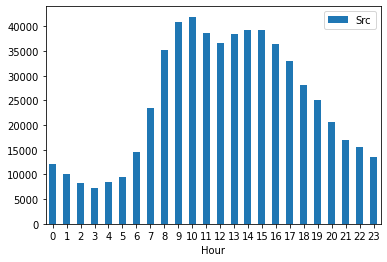

In [12]:
df.groupby('Hour').count().plot.bar(y='Src', rot=0)


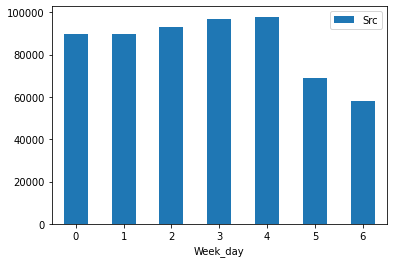

In [13]:
df.groupby('Week_day').count().plot.bar(y='Src', rot=0)


# Separete x and y from Src and Dst

In [14]:
def getFirst(data):
  return data[0]

def getSecond(data):
  return data[1]

# Src
df['Src_x'] = df.Src.apply(getFirst)
df['Src_y'] = df.Src.apply(getSecond)

# Dst
df['Dst_x'] = df.Dst.apply(getFirst)
df['Dst_y'] = df.Dst.apply(getSecond)


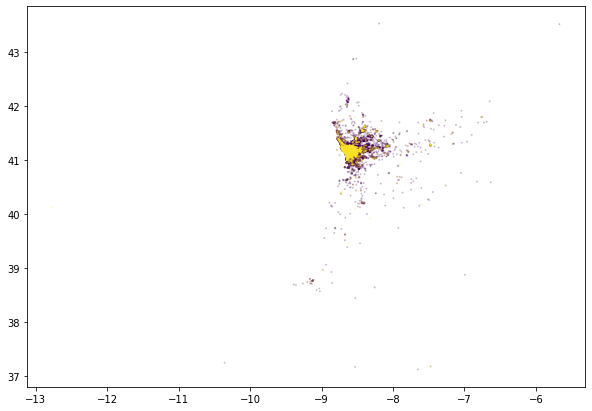

In [15]:
x = np.concatenate((df.Dst_x,  df.Src_x))
y = np.concatenate((df.Dst_y, df.Src_y))

colors = np.concatenate(([0 for i in range(int(len(x)/2))], [1 for i in range(int(len(x)/2))]))
area = (np.zeros(len(x)) + 1)

plt.figure(figsize=(10,7))
plt.scatter(x, y, s=area, c=colors, alpha=0.2)
plt.show()

In [16]:
print(len(df.Dst_x), len(np.concatenate((df.Dst_x, df.Src_x))))


593700 1187400


# Get Distrito, concelho and freguesia of all coordenates



In [17]:
import requests
from time import time
def formaCoordenates(coord):
  return [coord[1], coord[0]]

data = df.Dst.apply(formaCoordenates).to_list()
# data = df.Dst.to_list()
len(data)

593700

In [18]:
# t = time()
# res = []
# for d in data:
#     r = requests.post('http://192.168.1.65:3000/get_single', json = {'coord': d})
#     res.append(r.json())

# print(time() - t)

# distrito = []
# concelho = []
# freguesia = []

# for r in res:
#     distrito.append(r['distrito'])
#     concelho.append(r['concelho'])
#     freguesia.append(r['freguesia'])

# df['distrito'] = distrito
# df['concelho'] = concelho
# df['freguesia'] = freguesia

# Pontos atratores Geral

In [19]:
count_points = {}
num_decimal_vals = 6
def atract_func(point):
    point = str( [int(point[0]*10**num_decimal_vals)/10**num_decimal_vals,
                  int(point[1]*10**num_decimal_vals)/10**num_decimal_vals] )
    if point not in count_points.keys():
        count_points[point]=0
    count_points[point]+=1
df.Dst.apply(atract_func)
count_points

{'[-8.591688, 41.146677]': 1,
 '[-8.609967, 41.153832]': 1,
 '[-8.624358, 41.179554]': 2,
 '[-8.630595, 41.15448]': 1,
 '[-8.641323, 41.144175]': 1,
 '[-8.60274, 41.194683]': 1,
 '[-8.630622, 41.154804]': 1,
 '[-8.6076, 41.153589]': 3,
 '[-8.660565, 41.149872]': 2,
 '[-8.607753, 41.143707]': 1,
 '[-8.612919, 41.153661]': 1,
 '[-8.599644, 41.153652]': 1,
 '[-8.571915, 41.15916]': 1,
 '[-8.598555, 41.149008]': 1,
 '[-8.597709, 41.163741]': 1,
 '[-8.630694, 41.15448]': 2,
 '[-8.606817, 41.150097]': 1,
 '[-8.579862, 41.155695]': 1,
 '[-8.637732, 41.051457]': 1,
 '[-8.63307, 41.147154]': 1,
 '[-8.624439, 41.179518]': 1,
 '[-8.613801, 41.179599]': 1,
 '[-8.603253, 41.150943]': 1,
 '[-8.599158, 41.150826]': 1,
 '[-8.632782, 41.147127]': 1,
 '[-8.630388, 41.15718]': 1,
 '[-8.60733, 41.150142]': 1,
 '[-8.611362, 41.192955]': 1,
 '[-8.606106, 41.121738]': 1,
 '[-8.598312, 41.186025]': 1,
 '[-8.611569, 41.160744]': 1,
 '[-8.609391, 41.166981]': 1,
 '[-8.597979, 41.15061]': 1,
 '[-8.650872, 41.162

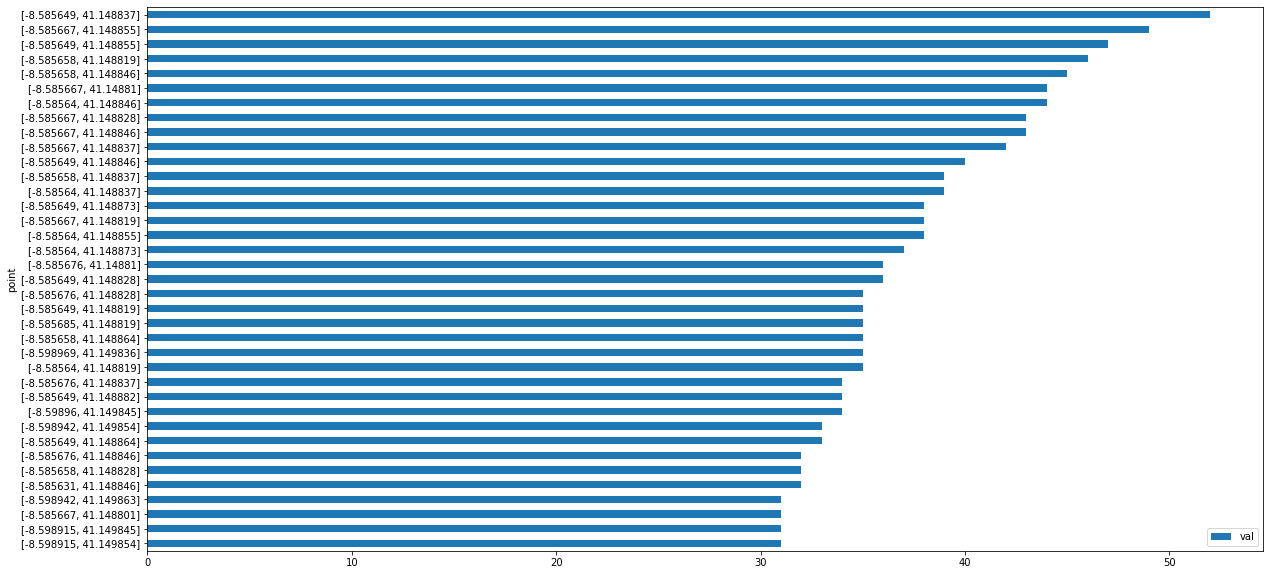

In [20]:
atract_points = []
for key in count_points.keys():
    if(count_points[key] > 30):
        atract_points.append({'point': key, 'val': count_points[key]})
df2 = pd.DataFrame(atract_points)
df2.sort_values(by=['val']).plot(x='point', y='val', rot=0, figsize=(20,10), kind="barh")

# Second csv
## Read csv

In [83]:
columns_names = ['id', 'fleet_id', 'operator_id', 'dispatch_date', 'schedule_date', 'cli', 'name_id', 'door_no', 'passenger', 'contact', 'dname_id', 'ddoor_no', 'obs', 'taxiFlags', 'driverFlags', 'reqFlags', 'ntaxis', 'taxis', 'client_id', 'completed', 'queue_id', 'initial_group_id', 'current_group_id', 'request_id', 'fleet_id_2', 'time', 'operator_id_2', 'taxi', 'taxiIndex', 'driver_id', 'event', 'data']

df_2 = pd.read_csv('luc_csv.csv', names=columns_names, skipinitialspace = True, quotechar="'")
df_2.head()

/Users/lucparada/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,fleet_id,operator_id,dispatch_date,schedule_date,cli,name_id,door_no,passenger,contact,...,current_group_id,request_id,fleet_id_2,time,operator_id_2,taxi,taxiIndex,driver_id,event,data
0,6213339L,0,32L,1.577876e+09,1.577876e+09,917665187,3021L,186,Mal merendas,NaN,...,None,6213339L,0L,1.57788e+09,18L,187L,0,None,a,UycnCnAwCi4=
1,6213339L,0,32L,1.577876e+09,1.577876e+09,917665187,3021L,186,Mal merendas,NaN,...,None,6213339L,0L,1.57788e+09,19L,187L,0,None,A,UycnCnAwCi4=
2,6213339L,0,32L,1.577876e+09,1.577876e+09,917665187,3021L,186,Mal merendas,NaN,...,None,6213339L,0L,1.57788e+09,18L,950L,0,None,c,UycnCnAwCi4=
3,6213339L,0,32L,1.577876e+09,1.577876e+09,917665187,3021L,186,Mal merendas,NaN,...,None,6213339L,0L,1.57788e+09,19L,187L,0,None,p,UycnCnAwCi4=
4,6213339L,0,32L,1.577876e+09,1.577876e+09,917665187,3021L,186,Mal merendas,NaN,...,None,6213339L,0L,1.57788e+09,19L,187L,0,None,q,UycnCnAwCi4=


## Drop useless columns

In [84]:
df_2 = df_2.drop(['operator_id', 'door_no', 'ddoor_no', 'fleet_id_2', 'obs', 'operator_id_2', 'queue_id', ], axis=1)

In [85]:
df_2[['time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416434 entries, 0 to 1416433
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   time    1416434 non-null  object
dtypes: object(1)
memory usage: 10.8+ MB


## Transform some columns 

In [86]:
# dispatch_date
# schedule_date
# time

def transformTimestamp(t):
    try:
        return int(t)
    except:
#         print(t)
        return t

# df_2['dispatch_date'] = df_2['dispatch_date'].transform(transformTimestamp)
# df_2['schedule_date'] = df_2['schedule_date'].transform(transformTimestamp)
df_2['time'] = df_2['time'].transform(transformTimestamp)

df_2[['dispatch_date', 'schedule_date', 'time']].head()


,dispatch_date,schedule_date,time
0,1.577876e+09,1.577876e+09,1577875920
1,1.577876e+09,1.577876e+09,1577875926
2,1.577876e+09,1.577876e+09,1577875920
3,1.577876e+09,1.577876e+09,1577876426
4,1.577876e+09,1.577876e+09,1577877792


In [88]:

def transform_taxi(taxi):
    taxi = taxi[:-1]
    s = len(taxi)
    return '2'+'0'*(7-len(taxi))+taxi
df_2['taxi_transformed'] = df_2['taxi'].transform(transform_taxi)
df_2[['taxi_transformed']]

,taxi_transformed
0,20000187
1,20000187
2,20000950
3,20000187
4,20000187
...,...
1416429,20000276
1416430,20000276
1416431,20000276
1416432,20000276


# Find Clients

In [89]:
data = []
# df_numpy = df.to_numpy()
for d in tqdm(df_numpy[-300:]):
    a = df_2[df_2['taxi_transformed'] == d[0]]
    a = list(a[a['time'] == d[1]]['cli'])
    if len(a)>0:
        data.append(a)
data


[]

In [34]:
a = [1,2,3,4]
a[-2:]

[3, 4]

In [27]:
df.head().to_numpy()[0]

array(['20000012', 1577837132, list([-8.60643, 41.144607]),
       list([-8.591688, 41.146677000000004]), 2351.740021913072, 298,
       Timestamp('2020-01-01 00:05:32+0000', tz='Etc/GMT'), 2, 0,
       -8.60643, 41.144607, -8.591688, 41.146677000000004], dtype=object)

In [183]:
# a = df_2[df_2['taxi_transformed'] == '20000667']
a = a[a['dispatch_date'] == 1577837386]
a

,id,fleet_id,dispatch_date,schedule_date,cli,name_id,passenger,contact,dname_id,taxiFlags,...,current_group_id,request_id,time,taxi,taxiIndex,driver_id,event,data,taxi_formated,taxi_transformed


In [68]:
# a = df_2[df_2['taxi_transformed'] == '20000031']
df_2.info()
# list(a[a['dispatch_date'] == 1577837216]['cli'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416434 entries, 0 to 1416433
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1416434 non-null  object 
 1   fleet_id          1416434 non-null  int64  
 2   dispatch_date     1416434 non-null  int64  
 3   schedule_date     1416434 non-null  int64  
 4   cli               1280439 non-null  object 
 5   name_id           1416434 non-null  object 
 6   passenger         134484 non-null   object 
 7   contact           0 non-null        float64
 8   dname_id          1416434 non-null  object 
 9   taxiFlags         1416434 non-null  object 
 10  driverFlags       1416434 non-null  object 
 11  reqFlags          1416434 non-null  object 
 12  ntaxis            1416434 non-null  int64  
 13  taxis             1416434 non-null  object 
 14  client_id         1416434 non-null  object 
 15  completed         1416434 non-null  int64  
 16  

In [82]:
int(1577902474.72755)
len(df_2[df_2['time'] == -1])



1400050

In [146]:
df_2.head()

,id,fleet_id,dispatch_date,schedule_date,cli,name_id,passenger,contact,dname_id,taxiFlags,...,initial_group_id,current_group_id,request_id,time,taxi,taxiIndex,driver_id,event,data,taxi_formated
0,6213339L,0,1577875920,1577876400,917665187,3021L,Mal merendas,NaN,0L,0L,...,None,None,6213339L,1.57788e+09,187L,0,None,a,UycnCnAwCi4=,20000187
1,6213339L,0,1577875920,1577876400,917665187,3021L,Mal merendas,NaN,0L,0L,...,None,None,6213339L,1.57788e+09,187L,0,None,A,UycnCnAwCi4=,20000187
2,6213339L,0,1577875920,1577876400,917665187,3021L,Mal merendas,NaN,0L,0L,...,None,None,6213339L,1.57788e+09,950L,0,None,c,UycnCnAwCi4=,20000950
3,6213339L,0,1577875920,1577876400,917665187,3021L,Mal merendas,NaN,0L,0L,...,None,None,6213339L,1.57788e+09,187L,0,None,p,UycnCnAwCi4=,20000187
4,6213339L,0,1577875920,1577876400,917665187,3021L,Mal merendas,NaN,0L,0L,...,None,None,6213339L,1.57788e+09,187L,0,None,q,UycnCnAwCi4=,20000187


In [55]:
df.head()

,Taxi_ID,Timestamp,Src,Dst,Distance,Duration,Timestamp_format,Week_day,Hour,Src_x,Src_y,Dst_x,Dst_y
0,20000012,1577837132,"[-8.60643, 41.144607]","[-8.591688, 41.146677000000004]",2351.740022,298,2020-01-01 00:05:32+00:00,2,0,-8.606430,41.144607,-8.591688,41.146677
1,20000031,1577837216,"[-8.609184, 41.162274000000004]","[-8.609967000000001, 41.153832]",959.068005,102,2020-01-01 00:06:56+00:00,2,0,-8.609184,41.162274,-8.609967,41.153832
2,20000667,1577837386,"[-8.619795, 41.148018]","[-8.624358, 41.179554]",4406.003140,513,2020-01-01 00:09:46+00:00,2,0,-8.619795,41.148018,-8.624358,41.179554
3,20000607,1577837418,"[-8.612991000000001, 41.155182]","[-8.630595, 41.15448]",2557.944254,327,2020-01-01 00:10:18+00:00,2,0,-8.612991,41.155182,-8.630595,41.154480
4,20000856,1577837503,"[-8.621397, 41.152833]","[-8.641323, 41.144175000000004]",5728.895360,472,2020-01-01 00:11:43+00:00,2,0,-8.621397,41.152833,-8.641323,41.144175


In [54]:
def parseInt(x):
    print(x)
    return int(x)
df_2['time'].transform(parseInt)

1577875920.04847
1577875926.1138802
1577875920.03415
1577876426.69929
1577877792.16427
1577789584.0833
1577855863.00116
1577855871.82343
1577855760.01825
1577856174.51031
1577858211.22852
1577801470.73303
1577855760.0227802
1577857448.06743
1577857457.2864401
1577857440.1589699
1577804089.01621
1577857840.8119302
1577859052.12473
1577804070.40289
1577857440.16182
1577858040.07238
1577858048.64922
1577858040.06711
1577858210.85629
1577859266.91812
1577812350.5206
1577861400.12568
1577861421.0935302
1577861429.23491
1577861410.56105
1577861400.05866
1577862578.19791
1577863778.56981
1577861410.4890301
1577861421.01124
1577824544.92717
1577836894.6791801
1577836898.08415
1577836894.67551
1577837170.9339
1577837170.92725
1577837299.29818
1577836968.70117
1577836949.0906801
1577836982.1747901
1577836985.99689
1577836949.08588
1577836979.05775
1577836959.30939
1577836979.06226
1577836959.31413
1577837001.5971901
1577837001.5895
1577837051.8237
1577837009.5565
1577837015.12424
1577837009.5510

1577841977.94705
1577842008.8099802
1577842020.3528
1577842035.7293801
1577842046.1068401
1577842067.34001
1577841977.5002902
1577841977.95365
1577841977.50537
1577842007.53961
1577842007.53716
1577842017.8071
1577842017.81303
1577842060.63524
1577842066.7932599
1577842066.78932
1577842073.92911
1577842073.93434
1577842091.57338
1577842072.80582
1577842072.80847
1577842081.9865901
1577842099.01225
1577842099.0061
1577842114.40636
1577842114.41815
1577842203.9837
1577842115.48024
1577842115.48367
1577842158.62971
1577842133.8106802
1577842133.80786
1577842144.1848302
1577842144.18801
1577842154.0890698
1577842182.5166302
1577842196.01366
1577842182.5113199
1577842190.27554
1577842203.67
1577842190.2802901
1577842203.6756
1577842209.66534
1577842230.35675
1577842250.98996
1577842260.24072
1577842219.87998
1577842240.67943
1577842216.63533
1577842207.91458
1577842240.5732698
1577842230.27531
1577842250.91695
1577842219.77284
1577842207.9186199
1577842213.92604
1577842948.49198
1577842948.

1577844723.12617
1577844513.51016
1577844640.3427598
1577844541.33868
1577844707.25566
1577844691.61897
1577844629.94051
1577844513.50501
1577844619.47198
1577844629.79569
1577844660.3368402
1577844649.7747
1577844670.6683302
1577844691.4411
1577844577.66853
1577844588.27366
1577844541.16797
1577844567.25813
1577844600.57945
1577844681.11965
1577844611.19042
1577844733.26997
1577844524.4093401
1577844644.23021
1577844556.80479
1577844722.91754
1577844706.94333
1577844640.21861
1577845079.72227
1577845079.7167802
1577845280.59447
1577844619.71432
1577844630.14655
1577844593.93796
1577844604.25262
1577844637.99749
1577844644.69732
1577844578.35817
1577844567.9774
1577844567.9723198
1577845362.7798
1577846064.6468
1577844630.0346198
1577844637.80646
1577844604.15465
1577844619.6089098
1577844593.80166
1577844578.2634199
1577844586.31216
1577844594.64782
1577844586.30436
1577845413.08673
1577845420.15546
1577844616.9240801
1577844597.2077
1577844587.18956
1577844621.20103
1577844612.79685


1577848489.35293
1577848591.8615198
1577848591.8587599
1577848639.2296698
1577848497.32326
1577848508.595
1577848470.35685
1577848470.3394198
1577848478.09286
1577848470.3475802
1577848470.33282
1577848680.71616
1577849447.65627
1577848485.5436199
1577848485.55099
1577848482.3134801
1577848496.70389
1577848496.61202
1577848505.38257
1577848505.38799
1577848510.1189802
1577848525.53721
1577848496.80533
1577848500.63325
1577848496.7896302
1577848687.3568099
1577849610.135
1577848509.8316
1577848509.82681
1577848525.05844
1577848525.07736
1577848826.21529
1577848545.42964
1577848549.6514301
1577848545.42697
1577850276.36182
1577848546.99368
1577848557.46489
1577848564.22086
1577848546.98492
1577848557.39888
1577848966.58131
1577848966.57593
1577849026.59046
1577848552.72688
1577848558.81098
1577848552.72136
1577848807.86314
1577849620.75536
1577848620.01174
1577848625.70784
1577848620.00863
1577849318.0302
1577849318.02492
1577849742.4535
1577848674.80229
1577848682.02116
1577848674.7992


1577851230.10022
1577851202.39328
1577851259.0702698
1577851190.49577
1577851190.49335
1577851245.71716
1577851217.8157198
1577851269.59725
1577851198.96912
1577851245.72762
1577851217.82625
1577851269.59998
1577851198.97369
1577851289.33895
1577851223.50665
1577851245.87649
1577851223.4981
1577851238.75366
1577851256.25512
1577851238.75879
1577851256.25848
1577851268.2116
1577851236.88607
1577851247.0195801
1577851236.8831801
1577851399.56302
1577851928.78995
1577851255.48517
1577851263.32463
1577851250.09919
1577851250.09674
1577851255.34739
1577851512.78724
1577851512.78193
1577851750.11288
1577851281.34166
1577851281.33461
1577851292.10743
1577851292.11095
1577851312.31676
1577851284.90466
1577851289.9764302
1577851284.89756
1577851502.5655198
1577851952.0227
1577851329.03668
1577851375.6767
1577851344.76216
1577851360.1822698
1577851325.25381
1577851325.24687
1577851344.65301
1577851360.06841
1577851375.57359
1577851328.75883
1577851396.74268
1577851403.96625
1577851329.14686
1577

1577854019.15433
1577854554.03483
1577854402.1247802
1577854611.3526099
1577854523.18509
1577854354.90267
1577854464.8098302
1577854251.9423401
1577854293.32925
1577854233.95877
1577854500.81015
1577854638.36713
1577854487.11543
1577854585.3561301
1577854409.48655
1577854444.72084
1577854308.81286
1577854623.05274
1577854391.50145
1577854229.55234
1577854564.64239
1577854283.1607301
1577854019.15082
1577854339.44359
1577854611.24699
1577854354.7741401
1577854428.9022698
1577854444.29315
1577854585.18888
1577854500.68554
1577854523.07883
1577854282.98606
1577854464.65222
1577854391.40425
1577854553.92809
1577854251.8657901
1577854638.2532198
1577854487.00129
1577854376.07717
1577854024.48034
1577854564.4974
1577854409.35772
1577854622.95151
1577854538.5404198
1577854365.63415
1577854475.91184
1577854267.3203099
1577854308.74011
1577854249.29884
1577854516.5092
1577854497.3096
1577854595.70895
1577854413.44116
1577854460.0356698
1577854324.13029
1577854627.80693
1577854402.03562
15778542

1577858661.58446
1577858762.66361
1577858473.26177
1577858488.79262
1577858623.94734
1577858429.13941
1577858606.65115
1577858720.4793801
1577858774.29791
1577858435.71179
1577858658.01896
1577858609.3863802
1577858699.39998
1577858392.71926
1577858671.91941
1577858312.64295
1577858616.90881
1577858287.18771
1577858821.12155
1577858790.0407698
1577858261.4043
1577858736.09113
1577858386.8196099
1577858709.94506
1577858580.77302
1577858345.1271
1577858520.0615098
1577858376.35186
1577858805.65728
1577858639.6379
1577858676.27043
1577858457.46597
1577858327.9905
1577858333.79091
1577858650.14267
1577858683.82249
1577858446.95193
1577858747.0276
1577858418.69033
1577858568.87221
1577858355.45832
1577858530.78133
1577858365.79018
1577858408.27058
1577858302.48543
1577858601.77471
1577858546.53544
1577858276.80898
1577858591.36795
1577858574.9136
1577858504.46746
1577858836.59278
1577858558.3561099
1577858261.4010198
1577858312.5708401
1577858671.79181
1577858774.18074
1577858488.53926
1577

1577861831.0465698
1577861854.98099
1577861360.55345
1577861479.7695801
1577861443.55245
1577861304.81506
1577861412.63094
1577861708.83
1577861638.10409
1577861464.4219902
1577861698.30006
1577861248.39313
1577861525.90733
1577861627.7290099
1577861196.9218302
1577861222.71507
1577861094.4760802
1577861737.24268
1577861396.9151099
1577861875.36812
1577861386.54422
1577861376.05444
1577861263.70295
1577861238.1086
1577861330.8749301
1577861761.81982
1577861678.05634
1577861825.8859699
1577861458.96948
1577861839.5608099
1577861336.86483
1577861562.23739
1577861428.04194
1577861279.01014
1577861793.36934
1577861897.2943
1577861752.94933
1577861212.35659
1577861352.3587198
1577861859.95896
1577861536.43785
1577861803.75473
1577861320.5334802
1577861500.1173
1577861094.47371
1577861500.02518
1577861304.68354
1577861737.0378401
1577861825.58793
1577861677.9213
1577861793.1919901
1577861562.13591
1577861782.34022
1577861627.63341
1577861525.7964401
1577861721.61801
1577861514.47551
15778615

1577864128.33674
1577864190.6248
1577864141.49172
1577864156.37258
1577864204.02004
1577864170.6053698
1577864128.34089
1577864190.62827
1577864141.49708
1577864156.3758
1577864169.1506698
1577864174.8783698
1577864169.1445
1577864285.65341
1577864285.65034
1577864452.3835301
1577864181.3368402
1577864184.65193
1577864181.32632
1577864242.5274801
1577866028.0048199
1577864235.40754
1577864220.00785
1577864193.15153
1577864206.09264
1577864253.91159
1577864259.2223198
1577864245.9769402
1577864193.1457698
1577864562.64907
1577865575.76356
1577864245.90843
1577864235.27225
1577864197.91659
1577864219.93921
1577864253.83146
1577864197.92364
1577864319.5793
1577864305.50253
1577864279.40553
1577864279.4028099
1577864334.8411
1577864315.95887
1577864282.69585
1577864334.84435
1577864315.96165
1577864282.70014
1577864340.9512901
1577864309.57715
1577864320.82694
1577864325.66992
1577864309.5741599
1577864410.94543
1577864913.54489
1577864320.77776
1577864365.94356
1577864377.1316
1577864387.

1577870817.23808
1577870800.68099
1577870764.71796
1577870790.50829
1577870764.71399
1577871006.23471
1577871342.22027
1577870790.5044901
1577870810.8534698
1577870780.11762
1577870800.6747901
1577871074.73822
1577871078.17229
1577871074.73404
1577871097.0644
1577871849.60168
1577871188.81967
1577871196.60033
1577871162.81058
1577871173.6006901
1577871162.80819
1577871428.01598
1577872077.7822099
1577871173.5892699
1577871188.81331
1577871179.65209
1577871186.02734
1577871179.64766
1577871279.48915
1577872263.95561
1577871206.67019
1577871206.67258
1577871352.30921
1577871271.80899
1577871277.23309
1577871240.74152
1577871240.73711
1577871505.21399
1577872469.69423
1577871252.81737
1577871252.82414
1577871331.2118099
1577871415.5368
1577871419.57569
1577871331.20965
1577872277.3443902
1577872278.4844902
1577871376.21774
1577871376.22195
1577871334.8115401
1577871344.52145
1577871334.80728
1577871599.14481
1577872553.2617
1577871436.74148
1577871467.21563
1577871475.23323
1577871456.987

1577877328.7002199
1577877328.70688
1577877373.43718
1577877329.68349
1577877476.76371
1577877482.1238
1577877329.68076
1577877339.39975
1577877339.40567
1577878983.2616699
1577878983.25743
1577879000.84221
1577877352.80349
1577877356.64655
1577877352.8011901
1577877515.1900198
1577878576.79025
1577877355.12214
1577877358.66559
1577877355.11459
1577877589.7030098
1577878507.8118901
1577877399.15751
1577877509.42705
1577877514.71675
1577877399.1551301
1577877640.48416
1577878232.74473
1577877414.56564
1577877414.5701199
1577877480.06876
1577877485.7734199
1577877467.57991
1577877467.5775
1577877610.35284
1577880752.95933
1577877477.7295802
1577877477.73566
1577877502.60505
1577877502.60726
1577877594.95681
1577877581.09129
1577877586.83356
1577877581.08932
1577878021.61256
1577878456.5504198
1577877595.82476
1577877599.2838
1577877595.82285
1577877768.4287698
1577878633.31619
1577877600.0553699
1577877609.92979
1577877600.0484
1577877882.51431
1577879343.99755
1577877656.07655
157787766

1577880861.94543
1577880883.84354
1577880889.31225
1577880840.08443
1577880840.08028
1577883501.8310401
1577880872.06234
1577880843.99198
1577880872.06608
1577883517.15361
1577880843.99494
1577883517.1488
1577883534.97559
1577880949.8831599
1577880965.2268
1577880901.64449
1577880850.1108801
1577880857.87845
1577880939.37804
1577881002.98653
1577880886.17962
1577880990.97736
1577881046.47085
1577881051.85645
1577880923.99946
1577880912.17866
1577881024.7111402
1577881014.32282
1577880975.44375
1577881034.9825401
1577880866.56375
1577880850.10855
1577880850.11352
1577881263.12127
1577882099.26059
1577882030.30032
1577880965.16009
1577880975.3577
1577880912.08547
1577880949.80975
1577881014.16924
1577880901.57169
1577881002.90814
1577880939.2907
1577880923.9237401
1577881034.86155
1577881024.5605302
1577880990.88994
1577881046.34455
1577880877.1372302
1577880850.11733
1577880877.14153
1577880880.80255
1577880870.51192
1577880901.4017599
1577880923.00785
1577880891.0551698
1577880933.3907

1577882911.9654
1577882908.80196
1577883067.55646
1577883416.41535
1577883114.58086
1577882922.42326
1577883273.22029
1577883279.44069
1577882979.39838
1577882943.71946
1577883224.85365
1577882960.15031
1577883140.8280401
1577882922.41821
1577883124.7508
1577882928.44906
1577882989.65222
1577882953.99501
1577883235.03411
1577882975.4765599
1577883156.2470002
1577883124.75336
1577882928.45195
1577883894.80218
1577882989.65595
1577882953.9999
1577883235.03958
1577882975.48131
1577883156.25313
1577883894.79919
1577883931.08401
1577882972.53708
1577882978.5922
1577882972.53053
1577883028.07239
1577883970.332
1577883144.43908
1577883280.17277
1577883070.1189198
1577883006.04778
1577883006.02986
1577883010.53949
1577883023.44207
1577883247.75043
1577883006.0418
1577883006.02473
1577883072.44634
1577884278.78251
1577883148.83176
1577883283.65722
1577883085.28476
1577883012.70861
1577883033.75183
1577883257.9718099
1577883148.8338802
1577883266.69945
1577883283.66118
1577883085.28734
157788301

1577886120.8629
1577886185.2400599
1577885918.58873
1577886131.75938
1577885900.72395
1577886079.11941
1577886213.61215
1577885900.71669
1577886125.15999
1577886190.89972
1577885928.80215
1577886141.9654
1577885912.22051
1577886091.35192
1577886219.2314599
1577886125.16573
1577886190.90395
1577885928.80989
1577886141.97027
1577885912.2239301
1577886091.35677
1577886219.23539
1577886369.59425
1577885927.43754
1577885959.86375
1577886008.63324
1577885943.7476
1577886050.14092
1577885991.98452
1577885927.43361
1577885937.88096
1577885975.22896
1577886019.7257302
1577885954.69138
1577886062.02321
1577886002.36339
1577885937.8859599
1577885975.23526
1577886019.72977
1577885954.6954901
1577886062.04429
1577886002.3689198
1577886067.0127301
1577885956.9746
1577886050.73949
1577885938.35324
1577885938.3482301
1577885968.64803
1577885948.61201
1577885968.65381
1577885948.61931
1577886070.37412
1577885970.4134
1577885978.83847
1577885970.41025
1577886282.92766
1577886816.6642401
1577885998.57021

1577888112.63833
1577888126.75224
1577888145.60217
1577888112.64259
1577888126.78792
1577888157.76073
1577888178.41881
1577888193.99474
1577888203.83169
1577888208.8612401
1577888178.4161901
1577888655.4890199
1577889393.43587
1577888193.94678
1577888203.75051
1577888208.95495
1577888189.62792
1577888189.62377
1577888224.4504302
1577888204.91998
1577888224.45685
1577888204.92316
1577888231.46258
1577888252.10235
1577888214.4860198
1577888309.38887
1577888221.0062
1577888329.16905
1577888339.51498
1577888282.95634
1577888323.28905
1577888241.86578
1577888267.40326
1577888231.60886
1577888203.59443
1577888299.0608802
1577888203.58982
1577888636.51843
1577889190.56076
1577888267.33513
1577888220.94433
1577888323.2064
1577888231.53645
1577888298.99875
1577888329.1015902
1577888252.05318
1577888282.8386
1577888241.8058
1577888214.42207
1577888309.31925
1577888282.8327901
1577888288.75666
1577888282.82818
1577888866.96401
1577888866.9616
1577888885.4722
1577888296.99476
1577888302.20829
1577

1577892157.04288
1577892027.3601198
1577892092.08565
1577892167.34565
1577892285.81055
1577892290.42589
1577892129.41986
1577892270.15276
1577892222.16239
1577891886.72073
1577891815.67878
1577891831.26525
1577891957.36759
1577892129.2075
1577892054.79634
1577892152.73158
1577892156.86897
1577892123.45558
1577892066.16229
1577892091.9332
1577891929.84794
1577891913.3331802
1577892228.83695
1577892107.92202
1577891962.9265199
1577892211.23373
1577892200.35132
1577891941.92601
1577892008.10937
1577892249.57371
1577892189.91556
1577892239.26019
1577892081.5590801
1577892269.96487
1577892221.97377
1577892259.52463
1577892167.19411
1577892039.13835
1577892097.38471
1577892178.7741802
1577892140.9567099
1577892285.68326
1577892225.64496
1577891901.99505
1577891831.26865
1577892008.1129901
1577892835.22266
1577892835.21529
1577892849.1283698
1577891890.36743
1577891898.8026302
1577891890.3609
1577892149.76529
1577892817.5375
1577891902.43095
1577891907.9149
1577891902.42857
1577892056.23119
1

1577894532.11285
1577894709.79214
1577895158.0712
1577894476.1871
1577894434.32909
1577894684.361
1577894418.49688
1577894519.6187599
1577894862.62681
1577894560.33214
1577894730.2414598
1577895050.1577
1577894970.74002
1577894418.4909801
1577894659.22825
1577894547.4121802
1577894719.9471
1577895164.28602
1577894486.53092
1577894438.63027
1577894699.84818
1577894428.72584
1577894525.58429
1577894907.6369
1577894566.13695
1577894740.47237
1577895065.5297801
1577894986.0234
1577894659.23423
1577894547.41944
1577894719.95151
1577895164.29477
1577894486.54078
1577894438.6346
1577894699.85286
1577894428.7315302
1577894525.5896401
1577894907.63905
1577894566.14152
1577894740.47736
1577895065.53443
1577894986.03156
1577895244.2289698
1577894485.6012099
1577894472.52566
1577894502.29016
1577894510.95945
1577894472.51863
1577894832.4377599
1577895570.25498
1577894496.0660698
1577894479.43503
1577894496.06964
1577894479.44106
1577894539.3378599
1577894559.2126698
1577894569.62846
1577894577.131

1577898578.42875
1577898895.40757
1577899691.91132
1577898589.93322
1577898589.93016
1577898634.9851
1577898634.99061
1577898754.84844
1577898769.5991
1577898776.17935
1577898769.5966198
1577898932.8170302
1577899634.9335802
1577898815.37639
1577898819.3136
1577898815.37421
1577899075.96908
1577900042.64429
1577898880.97424
1577898881.02019
1577898928.0178301
1577898923.51319
1577898927.77771
1577898923.50984
1577899391.63429
1577900408.87611
1577899317.80269
1577899171.46614
1577899249.54074
1577899301.68325
1577899234.99568
1577899038.86071
1577899136.4254
1577899350.45974
1577899356.86547
1577899018.5313199
1577899018.52529
1577900001.43051
1577901342.99611
1577899328.04304
1577899181.64639
1577899259.98283
1577899311.93683
1577899238.76938
1577899051.4144099
1577899145.24102
1577899034.0604699
1577899328.04895
1577899181.65151
1577899260.08265
1577899311.93901
1577899238.77572
1577899051.42404
1577899145.24607
1577899034.06302
1577899043.95145
1577899054.12371
1577899043.94659
1577

TypeError: cannot convert the series to <class 'int'>

In [51]:
int('1577875920')

1577875920